By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/03/11

Videos:
* [[10分鐘搞懂機器學習] 2.3 機器學習教學 線性迴歸 數值預測模型使用](https://youtu.be/TWUUh3wuXfw?si=-LKZsH6jAMt7Eipv)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


Coefficients: [[0.44483545 0.73528831]]
Intercept: [31.53652653]


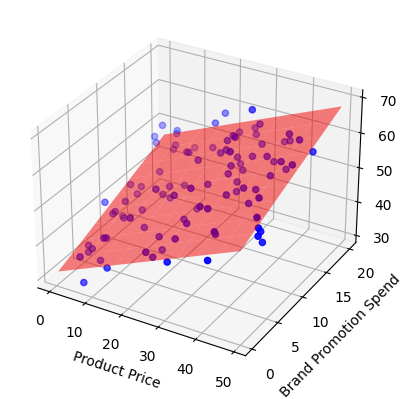

預計產品銷量: [47.80443083]
[[60.1985818 ]
 [46.80020419]
 [51.09484549]
 [56.82799607]
 [42.08125803]
 [65.01353045]
 [55.15945522]
 [61.88811172]
 [51.53369754]
 [59.05183704]
 [51.94605527]
 [49.04105627]
 [61.33293139]
 [59.48362023]
 [49.40096069]
 [40.11596261]
 [48.88726415]
 [56.86073413]
 [58.39047035]
 [66.23878174]
 [62.05247871]
 [54.55240533]
 [54.55665969]
 [59.90446839]
 [37.96857187]
 [48.82556049]
 [30.67283134]
 [47.32490423]
 [56.7351419 ]
 [36.99750194]
 [40.98022047]
 [56.47696685]
 [39.87352835]
 [56.69843891]
 [33.12489903]
 [56.23010595]
 [54.29518296]
 [50.03409555]
 [66.64373759]
 [53.09047079]
 [57.1913958 ]
 [50.92430954]
 [65.23079845]
 [52.45905022]
 [57.72236252]
 [56.83126819]
 [42.3614922 ]
 [51.21119791]
 [52.5142272 ]
 [46.98954116]
 [46.52446151]
 [51.16490021]
 [58.7088559 ]
 [41.90932135]
 [41.75393317]
 [49.18696069]
 [63.17645129]
 [43.1058064 ]
 [43.4504708 ]
 [35.16706326]
 [45.04799789]
 [41.91182013]
 [69.25767408]
 [47.10540524]
 [45.74317812]
 [5

In [ ]:
# Ex 1 建模
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 產生隨機數據
np.random.seed(0)
n_samples = 100
product_price = 50 * np.random.rand(n_samples, 1)  # 產品價格
brand_promotion = 20 * np.random.rand(n_samples, 1)  # 品牌推廣花費
sales = 30 + 0.5 * product_price + 0.8 * brand_promotion + np.random.randn(n_samples, 1) * 5  # 產品銷量，帶有隨機噪聲

# 合併特徵
X = np.concatenate((product_price, brand_promotion), axis=1)

# 擬合線性回歸模型
model = LinearRegression()
model.fit(X, sales)

# 提取模型參數
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# 繪製數據和模型預測
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(product_price, brand_promotion, sales, color='blue', label='Data points')
ax.set_xlabel('Product Price')
ax.set_ylabel('Brand Promotion Spend')
ax.set_zlabel('Sales')

# 生成預測網格
price_range = np.linspace(min(product_price), max(product_price), 10)
promotion_range = np.linspace(min(brand_promotion), max(brand_promotion), 10)
X_grid, Y_grid = np.meshgrid(price_range, promotion_range)
Z_pred = model.predict(np.array([X_grid.flatten(), Y_grid.flatten()]).T)
Z_grid = Z_pred.reshape(X_grid.shape)

# 繪製模型預測平面
ax.plot_surface(X_grid, Y_grid, Z_grid, alpha=0.5, color='red', label='Regression Plane')

# 添加圖例


plt.show()


a = coefficients[0][0]
b = coefficients[0][1]
c = intercept

y_hat=a*25+b*7+c
print("預計產品銷量:", y_hat)

print(sales)

In [ ]:
# Ex 3 給定範圍 最大化銷量
from scipy.optimize import minimize

def objective_function(x, a, b, c):
    return -(a * x[0] + b * x[1] + c)  # 要最大化，所以取负号

def maximize_expression(a, b, c, x1_range, x2_range):
    # 定义初始值
    initial_guess = [0, 0]
    # 定义约束条件（x1 和 x2 在给定范围内）
    bounds = [(x1_range[0], x1_range[1]), (x2_range[0], x2_range[1])]
    # 最大化目标函数
    result = minimize(objective_function, initial_guess, args=(a, b, c), bounds=bounds)
    # 返回最大化的结果
    return result.x, -result.fun  # -result.fun 是因为目标函数取负号

# 先跑上一段程式碼，獲得 a b c

x1_range = (10, 30)
x2_range = (5, 15)
solution, maximum_value = maximize_expression(a, b, c, x1_range, x2_range)
print("最大化表达式的解:", solution)
print("最大化的值:", maximum_value)



最大化表达式的解: [30. 15.]
最大化的值: 55.91091451488753


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 重新設定隨機種子以確保結果可重現
np.random.seed(0)

# 生成假數據
n_samples = 100
house_sizes_pyeong = np.random.uniform(15, 60, size=(n_samples, 1))  # 房子大小 (15 到 60 坪)
train_distances = 7.5 * np.random.rand(n_samples, 1) + 0.5  # 火車站距離 (0.5 到 8 公里)
house_ages = np.random.uniform(0, 40, size=(n_samples, 1))  # 屋齡 (0 到 40 年)
house_prices = 13000000 + 130000 * house_sizes_pyeong - 700000 * train_distances - 50000 * house_ages + 11000000 * np.random.rand(n_samples, 1)  # 房價 (1300 萬到 2400 萬)

# 將特徵合併成一個矩陣
X = np.concatenate((house_sizes_pyeong, train_distances, house_ages), axis=1)
y = house_prices

# 建立並擬合線性回歸模型
model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# 給定特徵值 x1=30, x2=5, x3=15，計算對應的房價
x_new = np.array([[30, 5, 15]])
predicted_price = model.predict(x_new)
print("預測的房價:", predicted_price[0])




Coefficients: [[ 132968.2294195 -815532.0946415  -82217.4078838]]
Intercept: [19264762.23566785]
預測的房價: [17942887.52678827]


<Figure size 1200x500 with 0 Axes>

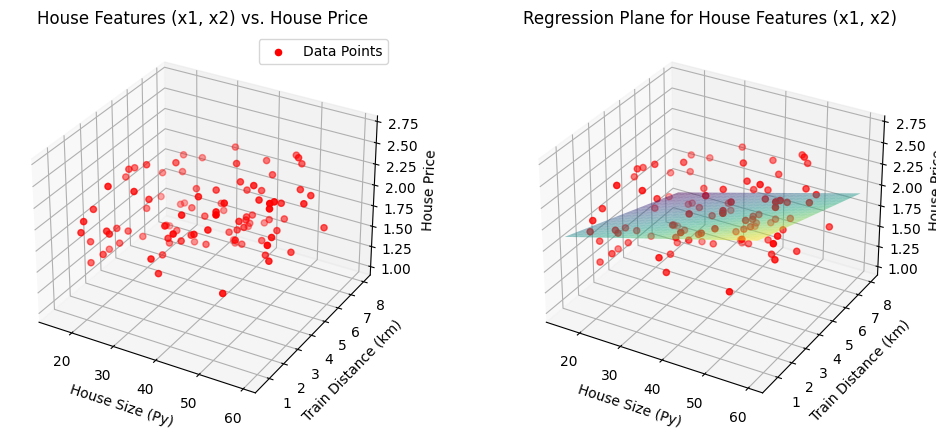

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# 將特徵合併成一個矩陣
X = np.concatenate((house_sizes_pyeong, train_distances), axis=1)
y = house_prices

# 建立並擬合線性回歸模型
model = LinearRegression()
model.fit(X, y)

# 繪製圖表
fig = plt.figure(figsize=(12, 5))

# 繪製圖表
fig = plt.figure(figsize=(12, 5))

# Plot 1: y, x1, x2 資料點圖
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(house_sizes_pyeong, train_distances, house_prices, c='r', marker='o', label='Data Points')
ax1.set_xlabel('House Size (Py)')
ax1.set_ylabel('Train Distance (km)')
ax1.set_zlabel('House Price')
ax1.set_title('House Features (x1, x2) vs. House Price')
ax1.legend()

# Plot 2: ([x1 x2], y) 的回歸平面圖
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], y, c='r', marker='o', label='Data Points')
x1_mesh, x2_mesh = np.meshgrid(np.linspace(15, 60, 30), np.linspace(0.5, 8, 30))
X_mesh = np.column_stack((x1_mesh.flatten(), x2_mesh.flatten()))
house_prices_mesh = model.predict(X_mesh)
house_prices_mesh = house_prices_mesh.reshape(x1_mesh.shape)
ax2.plot_surface(x1_mesh, x2_mesh, house_prices_mesh, alpha=0.5, cmap='viridis', label='Regression Plane')
ax2.set_xlabel('House Size (Py)')
ax2.set_ylabel('Train Distance (km)')
ax2.set_zlabel('House Price')
ax2.set_title('Regression Plane for House Features (x1, x2)')

plt.show()

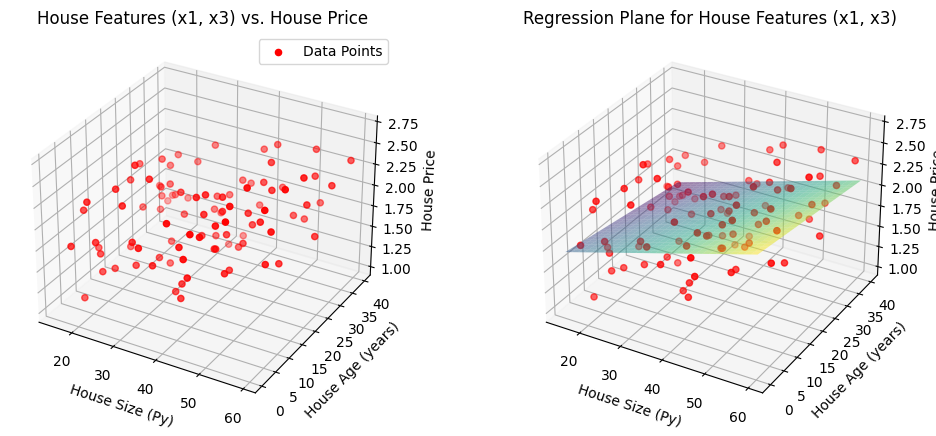

In [ ]:
# 將特徵合併成一個矩陣
X = np.concatenate((house_sizes_pyeong, house_ages), axis=1)
y = house_prices

# 建立並擬合線性回歸模型
model = LinearRegression()
model.fit(X, y)

# 繪製圖表
fig = plt.figure(figsize=(12, 5))

# Plot 3: y, x1, x3 資料點圖
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(house_sizes_pyeong, house_ages, house_prices, c='r', marker='o', label='Data Points')
ax1.set_xlabel('House Size (Py)')
ax1.set_ylabel('House Age (years)')
ax1.set_zlabel('House Price')
ax1.set_title('House Features (x1, x3) vs. House Price')
ax1.legend()

# Plot 4: ([x1 x3], y) 的回歸平面圖
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], y, c='r', marker='o', label='Data Points')
x1_mesh, x3_mesh = np.meshgrid(np.linspace(15, 60, 30), np.linspace(0, 40, 30))
X_mesh = np.column_stack((x1_mesh.flatten(), x3_mesh.flatten()))
house_prices_mesh = model.predict(X_mesh)
house_prices_mesh = house_prices_mesh.reshape(x1_mesh.shape)
ax2.plot_surface(x1_mesh, x3_mesh, house_prices_mesh, alpha=0.5, cmap='viridis', label='Regression Plane')
ax2.set_xlabel('House Size (Py)')
ax2.set_ylabel('House Age (years)')
ax2.set_zlabel('House Price')
ax2.set_title('Regression Plane for House Features (x1, x3)')


plt.show()

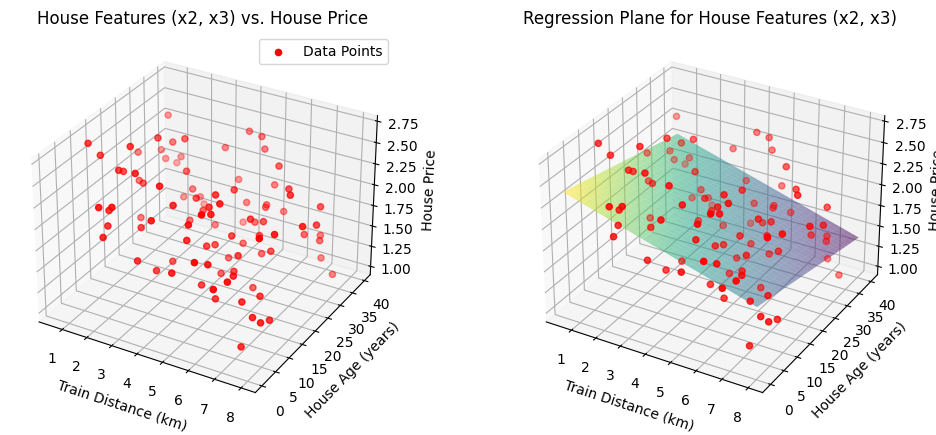

In [ ]:
# 將特徵合併成一個矩陣
X = np.concatenate((train_distances, house_ages), axis=1)
y = house_prices

# 建立並擬合線性回歸模型
model = LinearRegression()
model.fit(X, y)

# 繪製圖表
fig = plt.figure(figsize=(12, 5))

# Plot 5: y, x2, x3 資料點圖
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(train_distances, house_ages, house_prices, c='r', marker='o', label='Data Points')
ax1.set_xlabel('Train Distance (km)')
ax1.set_ylabel('House Age (years)')
ax1.set_zlabel('House Price')
ax1.set_title('House Features (x2, x3) vs. House Price')
ax1.legend()

# Plot 6: ([x2 x3], y) 的回歸平面圖
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], y, c='r', marker='o', label='Data Points')
x2_mesh, x3_mesh = np.meshgrid(np.linspace(0.5, 8, 30), np.linspace(0, 40, 30))
X_mesh = np.column_stack((x2_mesh.flatten(), x3_mesh.flatten()))
house_prices_mesh = model.predict(X_mesh)
house_prices_mesh = house_prices_mesh.reshape(x2_mesh.shape)
ax2.plot_surface(x2_mesh, x3_mesh, house_prices_mesh, alpha=0.5, cmap='viridis', label='Regression Plane')
ax2.set_xlabel('Train Distance (km)')
ax2.set_ylabel('House Age (years)')
ax2.set_zlabel('House Price')
ax2.set_title('Regression Plane for House Features (x2, x3)')

plt.show()